<a href="https://colab.research.google.com/github/palakagl/DeepLearning/blob/main/Code_for_TACOdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries

In [1]:
# Import modules
# Add modules as needed
from sklearn.model_selection import train_test_split

# For windows laptops add following 2 lines:
# import matplotlib
# matplotlib.use('agg')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import PIL
import json
import glob

import tensorflow as tf
import tensorflow_hub as hub

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Data preparation
#### Import data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
meta_df=pd.read_csv("/content/drive/MyDrive/MMAI_894/TACO_Dataset/meta_df.csv")

In [4]:
meta_df.head(5)

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area
0,0,1537,2049,batch_1/000006.jpg,6,Glass bottle,Bottle,1,517.0,127.0,447.0,1322.0,403954.0
1,1,1537,2049,batch_1/000008.jpg,18,Meal carton,Carton,2,1.0,457.0,1429.0,1519.0,1071259.5
2,1,1537,2049,batch_1/000008.jpg,14,Other carton,Carton,3,531.0,292.0,1006.0,672.0,99583.5
3,2,1537,2049,batch_1/000010.jpg,5,Clear plastic bottle,Bottle,4,632.0,987.0,500.0,374.0,73832.5
4,2,1537,2049,batch_1/000010.jpg,7,Plastic bottle cap,Bottle cap,5,632.0,989.0,44.0,51.0,915.0


In [5]:
meta_df.describe().T

,count,mean,std,min,25%,50%,75%,max
img_id,4784.0,756.936037,445.884396,0.000000,354.75,743.00,1154.000,1499.0
img_width,4784.0,2794.278428,714.851079,842.000000,2448.00,2448.00,3264.000,6000.0
img_height,4784.0,3234.358278,837.244672,474.000000,2448.00,3264.00,4000.000,5312.0
cat_id,4784.0,34.079013,20.081707,0.000000,12.00,36.00,57.000,59.0
ann_id,4784.0,2391.949833,1381.264283,1.000000,1195.75,2392.50,3588.250,4783.0
x,4784.0,1232.285117,703.739763,-1.000000,741.60,1150.00,1612.000,5573.0
y,4784.0,1485.067894,826.005410,-1.316667,892.75,1414.00,1961.250,5208.0
width,4784.0,331.434419,440.431739,10.000000,68.00,179.50,405.250,3758.0
height,4784.0,320.246833,442.046602,4.000000,62.00,159.00,387.000,3995.0
area,4784.0,150407.154132,485084.750277,55.500000,2142.00,14244.75,75333.125,7328035.5


In [6]:
dtypes=pd.DataFrame(meta_df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=meta_df.nunique()
dtypes["Null Values"]=meta_df.isnull().sum()
dtypes["% null Values"]=meta_df.isnull().sum()/len(meta_df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
img_id,int64,1500,0,0.000000
img_width,int64,44,0,0.000000
img_height,int64,46,0,0.000000
img_file,object,1500,0,0.000000
cat_id,int64,59,0,0.000000
cat_name,object,59,0,0.000000
supercategory,object,28,0,0.000000
ann_id,int64,4782,0,0.000000
x,float64,2414,0,0.000000
y,float64,2630,0,0.000000


<Figure size 2520x864 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Categories')

Text(0.5, 0, 'Super Categories')

Text(0, 0.5, 'Count')

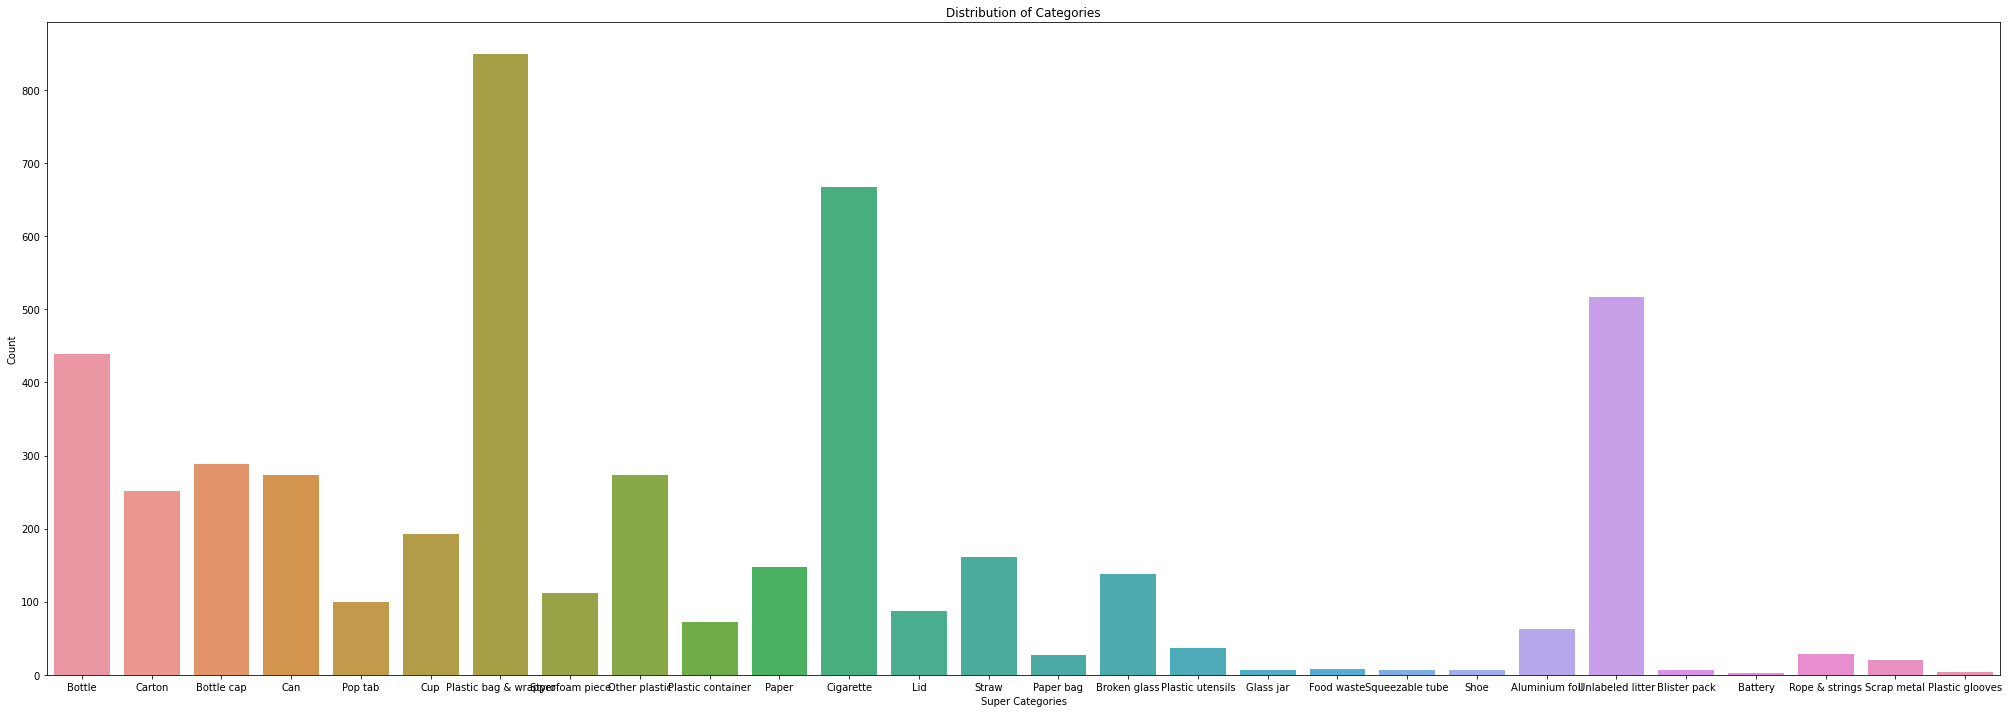

In [7]:
plt.figure(figsize=(35,12))

d=sns.countplot(data = meta_df, x = 'supercategory')

plt.title('Distribution of Categories')
plt.xlabel('Super Categories')
plt.ylabel('Count')

In [8]:
dir_path = '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data'
img_list = glob.glob(os.path.join(dir_path, '*/*.*'))
num_Images = len(img_list)
print('Number of Images:', num_Images)

Number of Images: 1500


In [9]:
img_list

['/content/drive/MyDrive/MMAI_894/TACO_Dataset/data/batch_7/000000.JPG',
 '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data/batch_7/000002.JPG',
 '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data/batch_7/000005.JPG',
 '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data/batch_7/000006.JPG',
 '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data/batch_7/000003.JPG',
 '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data/batch_7/000001.JPG',
 '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data/batch_7/000004.JPG',
 '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data/batch_7/000024.JPG',
 '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data/batch_7/000025.JPG',
 '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data/batch_7/000033.JPG',
 '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data/batch_7/000021.JPG',
 '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data/batch_7/000012.JPG',
 '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data/batch_7/000030.JPG',
 '/content/drive/MyDrive/MMAI_894/TACO_Dataset/data

Data Preprocessing and Augumentation

In [10]:
train=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.2,
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1/255,
                        validation_split=0.2)

train_generator = train.flow_from_dataframe(dataframe=meta_df,
                                            directory=dir_path,
                                            target_size=(274,274),
                                            batch_size=32,                                         
                                            x_col='img_file',
                                            class_mode='categorical',
                                            y_col='supercategory',
                                            subset='training',
                                            seed=11)
test_generator =  test.flow_from_dataframe(dataframe=meta_df,
                                            directory=dir_path,
                                            target_size=(274,274),
                                            batch_size=32,                                         
                                            x_col='img_file',
                                            class_mode='categorical',
                                            y_col='supercategory',
                                            subset='validation',
                                            seed=11)

Found 3828 validated image filenames belonging to 28 classes.
Found 956 validated image filenames belonging to 28 classes.


In [11]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 274, 274, 3), (32, 28))

### Model

In [12]:
def build_model():
    # TODO: build the model, 
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(274, 274, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='sigmoid'))
    model.add(Dense(28, activation='softmax'))
    
    return model

def compile_model(model):
    # TODO: compile the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [13]:
model = build_model()
model = compile_model(model)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 272, 272, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 136, 136, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 134, 134, 256)     73984     
                                                                 
 conv2d_2 (Conv2D)           (None, 132, 132, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 66, 66, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 66, 66, 128)       0

Code needs be removed from below this line

In [14]:
## Checking the Accuracy for our Model
#model = build_model()
#model = compile_model(model)
#model, history = train_model(model, X_train, Y_train, X_val, Y_val)
#test_loss, test_accuracy = eval_model(model, X_test, Y_test)